In [1]:
import corner
import numpy as np
import matplotlib.pyplot as plt

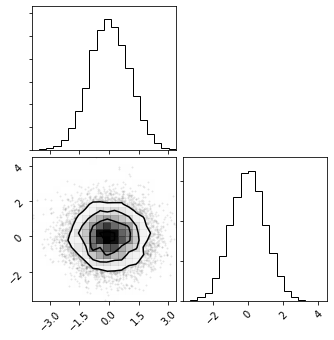

In [2]:
ndim, nsamples = 2, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
figure = corner.corner(samples)

np.randoms.seed()
https://www.sharpsightlabs.com/blog/numpy-random-seed/

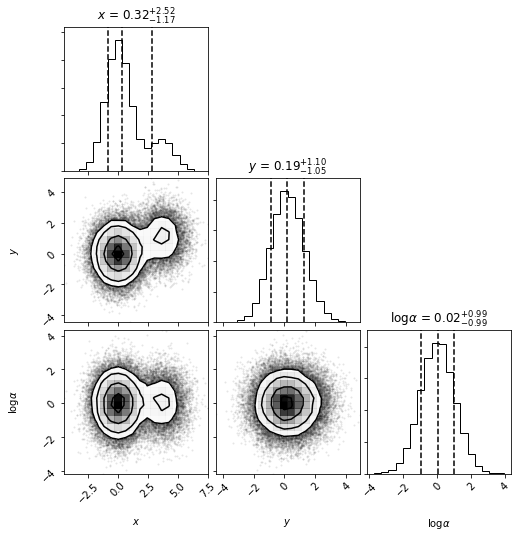

In [3]:
# Set up the parameters of the problem.
ndim, nsamples = 3, 50000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim])
data2 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))
data = np.vstack([data1, data2])

# Plot it.
figure = corner.corner(data, labels=[r"$x$", r"$y$", r"$\log \alpha$", r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [4]:
import h5py
specphoto = h5py.File('lgal.specphoto.noise_bgs0_legacy.vanilla.0.hdf5','r')
spec = h5py.File('lgal.spec.noise_none.vanilla.9.hdf5','r')
photo = h5py.File('lgal.photo.noise_none.vanilla.0.hdf5','r')

In [5]:
keys_specphoto = list(specphoto.keys())
print(keys_specphoto)

['flux_data', 'flux_ivar_data', 'flux_model', 'mcmc_chain', 'priors', 'redshift', 'theta_1sig_minus', 'theta_1sig_plus', 'theta_2sig_minus', 'theta_2sig_plus', 'theta_med', 'wavelength_data', 'wavelength_model']


In [19]:
data_specphoto = specphoto['mcmc_chain'] #6D 
print(data_specphoto.shape) #each line was where walker was at each iteration. plot all the position of walkers, easy to get marginalized 1d posteriors
data_spec = photo['mcmc_chain'] #5D
data_photo = photo['mcmc_chain'] #5D
#difficulry of MCMC: hard to ensure that MCMC converges, metrics to assess conversion: imperfect(galmen ruben convergence diagonostics)

(2000, 6)


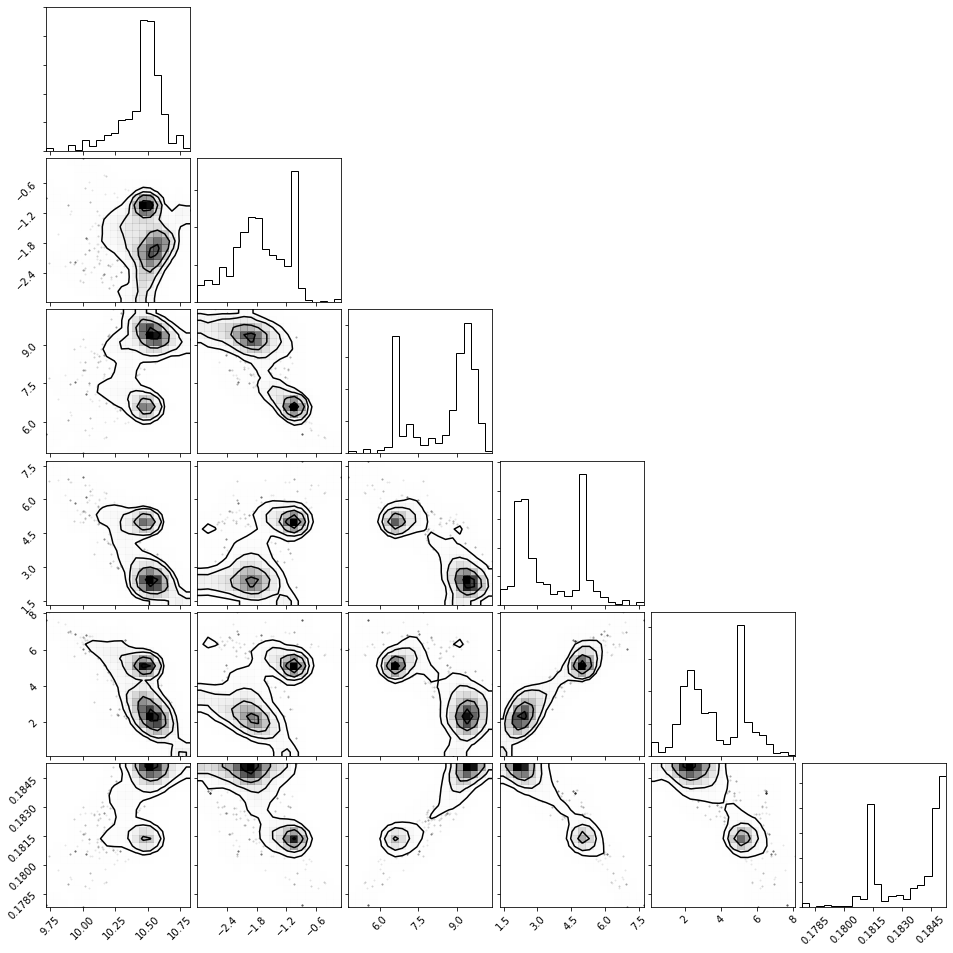

In [7]:
#data = np.asarray(f['mcmc_chain']).reshape([2000,ndim_data]) #no need to reshape?
fig_specphoto = corner.corner(data_specphoto, smooth = True)
#fig = corner.corner(f['mcmc_chain'], range=f['priors'], quantiles=[0.16, 0.5, 0.84], levels=[0.68, 0.95], nbin=40, smooth=True, truths=truths, labels=labels, label_kwargs={'fontsize': 20}) #from the mini_mocha.py

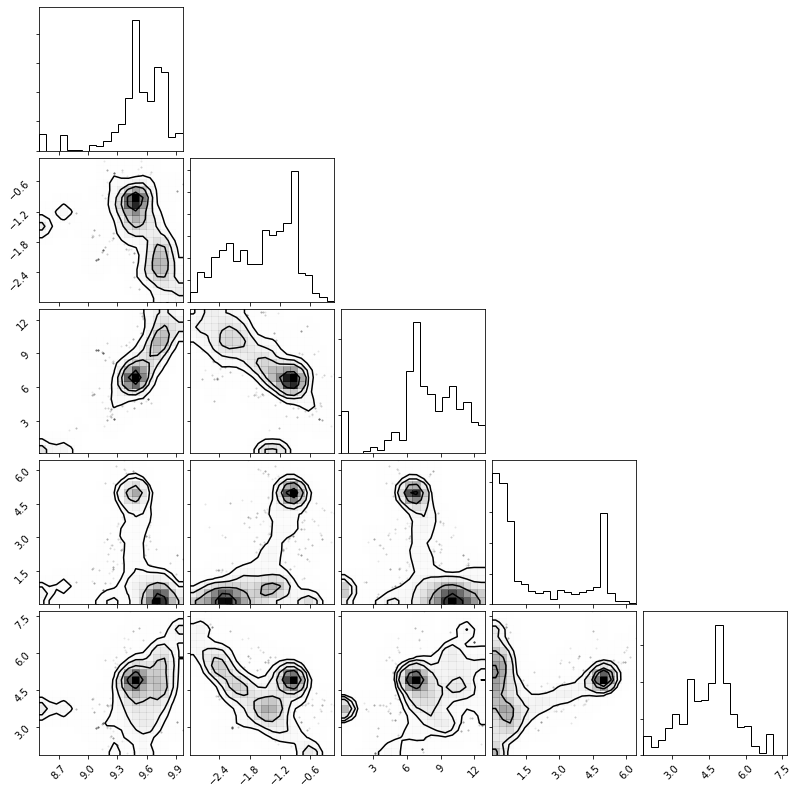

In [8]:
fig_spec = corner.corner(data_spec,smooth = True)

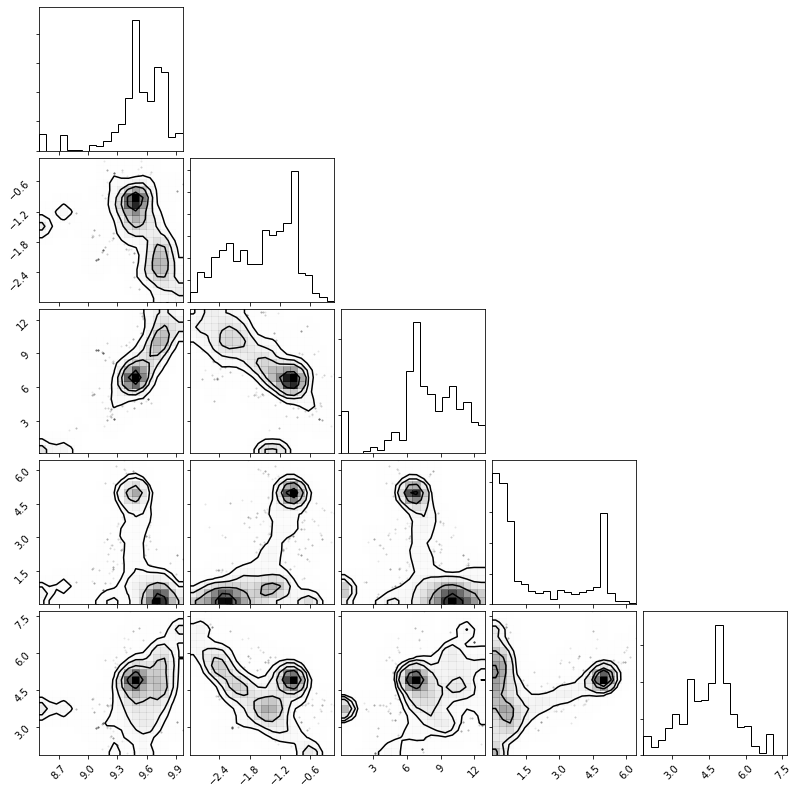

In [9]:
fig_photo = corner.corner(data_photo,smooth = True)

In [10]:
data_specphoto.shape
print(data_specphoto[:])

[[10.49899005 -1.00277623  6.49795016  4.9979198   5.04271783  0.18137375]
 [10.4980661  -1.00365964  6.50601569  4.99927623  5.049316    0.18138258]
 [10.49891546 -0.99980489  6.50325999  5.00157047  5.05064221  0.18137914]
 ...
 [10.53149686 -2.25569071  9.5060161   1.94430759  2.00264323  0.18499606]
 [10.47650407 -2.61108288  9.78544565  2.35056304  3.02437468  0.18524647]
 [10.42367241 -2.54543578  9.98722765  1.89192905  2.09394517  0.18529591]]


In [11]:
data1 = data_specphoto[:,0]
data2 = data_specphoto[:,1]
data3 = data_specphoto[:,2]
data4 = data_specphoto[:,3]
data5 = data_specphoto[:,4]
data6 = data_specphoto[:,5]

In [12]:
print(keys_specphoto)

['flux_data', 'flux_ivar_data', 'flux_model', 'mcmc_chain', 'priors', 'redshift', 'theta_1sig_minus', 'theta_1sig_plus', 'theta_2sig_minus', 'theta_2sig_plus', 'theta_med', 'wavelength_data', 'wavelength_model']


In [13]:
for key in keys_specphoto:
    print(specphoto[key].shape)

(6894,)
(6894,)
(1, 6894)
(2000, 6)
(6, 2)
()
(6,)
(6,)
(6,)
(6,)
(6,)
(6894,)
(1, 6894)


In [14]:
data1 = data_specphoto[:,0]
data2 = data_specphoto[:,1]
data3 = data_specphoto[:,2]
data4 = data_specphoto[:,3]
data5 = data_specphoto[:,4]
data6 = data_specphoto[:,5]

In [15]:
ls = list([data1,data2,data3,data4,data5,data6])

In [16]:
for l in ls:
    l = np.sort(l)
    print(l)

[ 9.71643259  9.71643259  9.71643259 ... 10.82524761 10.82524761
 10.82524761]
[-2.99924381 -2.99924381 -2.99924381 ... -0.10009352 -0.10009352
 -0.10009352]
[ 4.76410052  4.76410052  4.76410052 ... 10.23624645 10.3870481
 10.3870481 ]
[1.3157967  1.3157967  1.3157967  ... 7.72163751 7.72163751 7.72163751]
[0.11251031 0.11251031 0.11251031 ... 7.65905301 8.08511189 8.08511189]
[0.17780545 0.17780545 0.17780545 ... 0.18529701 0.18529701 0.18529701]


[0.18137375 0.18138258 0.18137914 ... 0.18499606 0.18524647 0.18529591]
